# Plot curve

##  Discharge capacity curves for 200th and 10th cycles for a representative cell

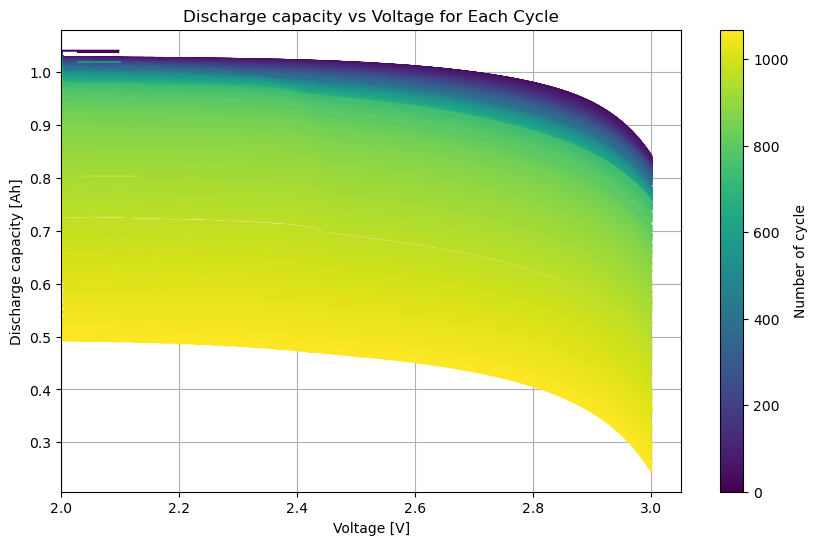

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path to the folder containing the Excel files
folder_path = '.../1_Range_3-2/storage'
file_name = 'b9c5.xlsx'
file_path = os.path.join(folder_path, file_name)

# Path to save the vector images
export_path = '.../1_Range_3-2/'

# Function to plot Qd vs Voltage for the specific file
def plot_qd_vs_voltage(file_path, export_path):
    xls = pd.ExcelFile(file_path)
    
    if 'Voltage' in xls.sheet_names and 'Qd' in xls.sheet_names:
        # Load the 'Voltage' and 'Qd' sheets
        voltage_df = pd.read_excel(xls, 'Voltage')
        qd_df = pd.read_excel(xls, 'Qd')
        
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # Normalize the color map to the number of cycles
        norm = plt.Normalize(0, len(voltage_df))
        sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
        sm.set_array([])

        # Plot each cycle with a color map
        for cycle in range(len(voltage_df)):
            ax.plot(voltage_df.iloc[cycle], qd_df.iloc[cycle], color=plt.cm.viridis(norm(cycle)))
        
        ax.set_xlabel('Voltage [V]')
        ax.set_ylabel('Discharge capacity [Ah]')
        # ax.set_title('Discharge capacity vs Voltage for Each Cycle')
        ax.set_xlim(left=2)  # Set x-axis to start at 2
        ax.grid(True)
        
        # Add color bar
        cbar = fig.colorbar(sm, ax=ax)
        cbar.set_label('Number of cycle')
        
        # Save the plot as SVG and PDF
        svg_path = os.path.join(export_path, 'qd_vs_voltage_plot.svg')
        pdf_path = os.path.join(export_path, 'qd_vs_voltage_plot.pdf')
        fig.savefig(svg_path, format='svg')
        fig.savefig(pdf_path, format='pdf')
        
        plt.show()
    else:
        print(f"Required sheets not found in file: {file_path}")

# Plot for the specific file and save the figure
plot_qd_vs_voltage(file_path, export_path)


##  Difference of the discharge capacity curves as a function of voltage between the 100th, 200th and 10th cycles of 1 battery

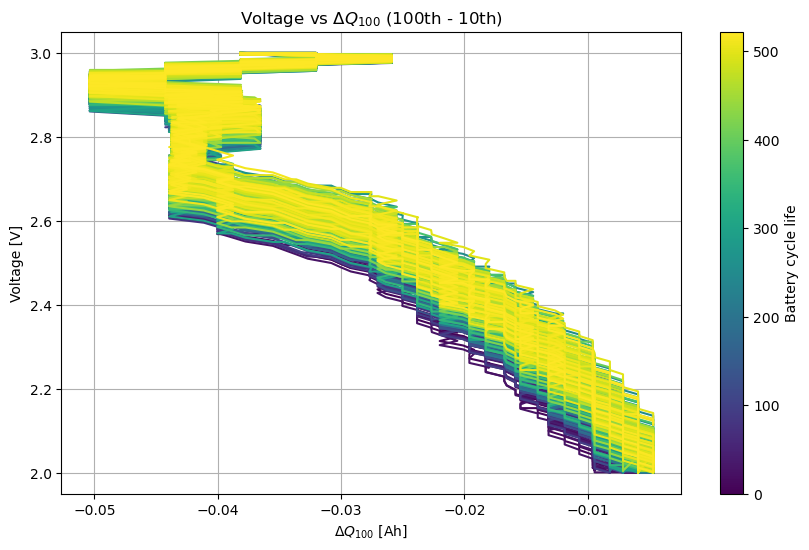

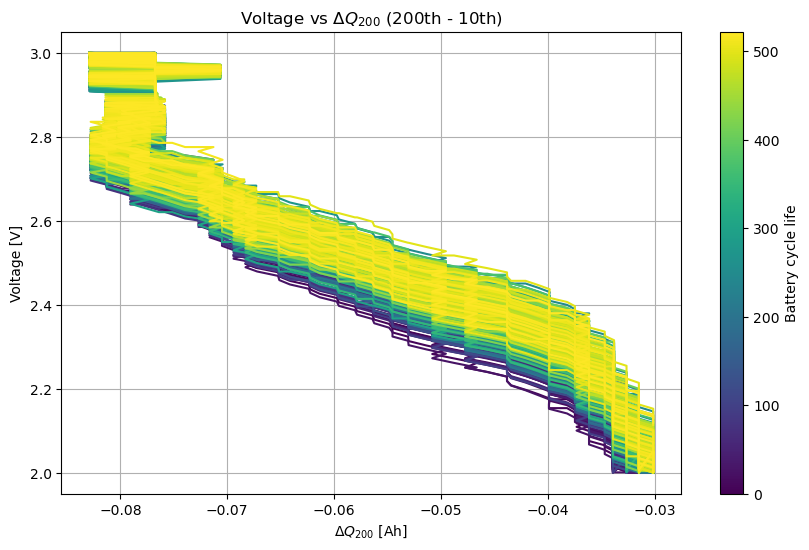

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path to the folder containing the Excel files
folder_path = '.../1_Range_3-2/storage'
file_name = 'b2c29.xlsx'
file_path = os.path.join(folder_path, file_name)

# Path to save the vector images
export_path = '.../1_Range_3-2/'

# Function to plot voltage vs the differential Qd for the specific file
def plot_voltage_vs_diff_qd(file_path, export_path):
    xls = pd.ExcelFile(file_path)
    
    if 'Voltage' in xls.sheet_names and 'Difference Qd' in xls.sheet_names:
        # Load the 'Voltage' and 'Difference Qd' sheets
        voltage_df = pd.read_excel(xls, 'Voltage')
        diff_qd_df = pd.read_excel(xls, 'Difference Qd', index_col=0)
        
        # Normalize the color map to the number of cycles
        norm = plt.Normalize(0, len(voltage_df))
        sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
        sm.set_array([])

        # Plot for "100th Qd - 10th Qd"
        fig1, ax1 = plt.subplots(figsize=(10, 6))
        for cycle in range(len(voltage_df)):
            ax1.plot(diff_qd_df.loc['100th Qd - 10th Qd'], voltage_df.iloc[cycle], color=plt.cm.viridis(norm(cycle)))
        ax1.set_xlabel('$\Delta Q_{100}$ [Ah]')
        ax1.set_ylabel('Voltage [V]')
        ax1.set_title('Voltage vs $\Delta Q_{100}$ (100th - 10th)')
        ax1.grid(True)
        
        # Add color bar
        cbar1 = fig1.colorbar(sm, ax=ax1)
        cbar1.set_label('Battery cycle life')

        # Save the plot as SVG and PDF
        svg_path1 = os.path.join(export_path, 'voltage_vs_dq100_plot.svg')
        pdf_path1 = os.path.join(export_path, 'voltage_vs_dq100_plot.pdf')
        fig1.savefig(svg_path1, format='svg')
        fig1.savefig(pdf_path1, format='pdf')

        plt.show()

        # Plot for "200th Qd - 10th Qd"
        fig2, ax2 = plt.subplots(figsize=(10, 6))
        for cycle in range(len(voltage_df)):
            ax2.plot(diff_qd_df.loc['200th Qd - 10th Qd'], voltage_df.iloc[cycle], color=plt.cm.viridis(norm(cycle)))
        ax2.set_xlabel('$\Delta Q_{200}$ [Ah]')
        ax2.set_ylabel('Voltage [V]')
        ax2.set_title('Voltage vs $\Delta Q_{200}$ (200th - 10th)')
        ax2.grid(True)
        
        # Add color bar
        cbar2 = fig2.colorbar(sm, ax=ax2)
        cbar2.set_label('Battery cycle life')

        # Save the plot as SVG and PDF
        svg_path2 = os.path.join(export_path, 'voltage_vs_dq200_plot.svg')
        pdf_path2 = os.path.join(export_path, 'voltage_vs_dq200_plot.pdf')
        fig2.savefig(svg_path2, format='svg')
        fig2.savefig(pdf_path2, format='pdf')

        plt.show()
    else:
        print(f"Required sheets not found in file: {file_path}")

# Plot for the specific file and save the figures
plot_voltage_vs_diff_qd(file_path, export_path)


##  Difference of the discharge capacity curves as a function of voltage between the 100th, 200th and 10th cycles of all battery

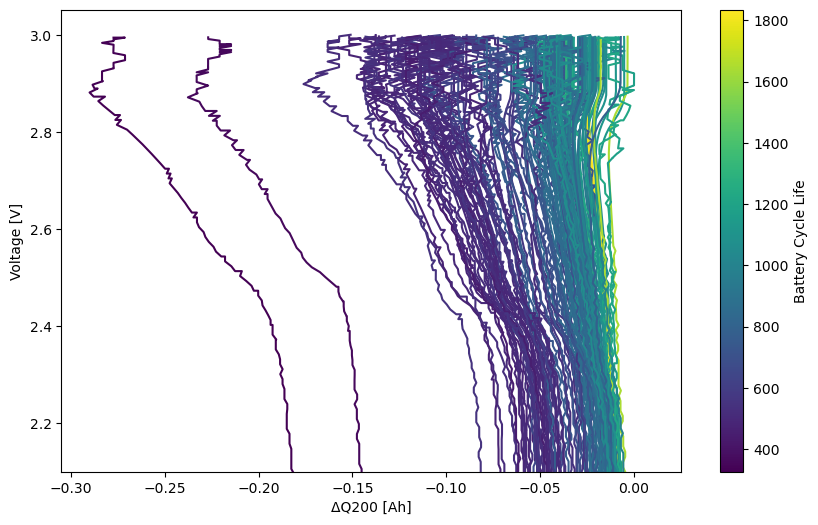

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Paths to the directories and files
data_directory_path = '.../1_Range_3-2/storage'
final_file_path = '.../Final.xlsx'
export_path = '.../1_Range_3-2/'

# Load the final file to get the cycle life information
final_df = pd.read_excel(final_file_path)

# Extract cycle life data
cycle_life = final_df.set_index('file')['Cycle']

# Create a colormap based on cycle life
norm = plt.Normalize(vmin=cycle_life.min(), vmax=cycle_life.max())
cmap = plt.cm.viridis

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Process each file in the directory
for filename in os.listdir(data_directory_path):
    if filename.endswith('.xlsx') and filename in cycle_life.index:
        file_path = os.path.join(data_directory_path, filename)
        
        # Load the Excel file
        excel_file = pd.ExcelFile(file_path)
        
        # Extract the 200th row from the Voltage sheet and the "200th Qd - 10th Qd" data from the Difference Qd sheet
        voltage_data = excel_file.parse('Voltage').iloc[199, 1:]
        diff_qd_data = excel_file.parse('Difference Qd').iloc[1, 1:]
        
        # Ensure the dimensions match by truncating the longer series to match the shorter one
        min_length = min(len(voltage_data), len(diff_qd_data))
        voltage_data = voltage_data.iloc[:min_length]
        diff_qd_data = diff_qd_data.iloc[:min_length]
        
        # Get the color for the current file based on its cycle life
        color = cmap(norm(cycle_life[filename]))
        
        # Plot the data
        ax.plot(diff_qd_data, voltage_data, label=filename, color=color)

# Add color bar for cycle life
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Battery Cycle Life')

# Add labels and title
ax.set_xlabel('ΔQ200 [Ah]')
ax.set_ylabel('Voltage [V]')
ax.set_ylim(2.1, ax.get_ylim()[1])  # Set the y-axis starting from 2

# Save the plot as SVG and PDF in the specified directory
export_svg = os.path.join(export_path, 'voltage_vs_dq200_plot.svg')
export_pdf = os.path.join(export_path, 'voltage_vs_dq200_plot.pdf')
fig.savefig(export_svg, format='svg')
fig.savefig(export_pdf, format='pdf')

# Show the plot
plt.show()


## SoH over cycle

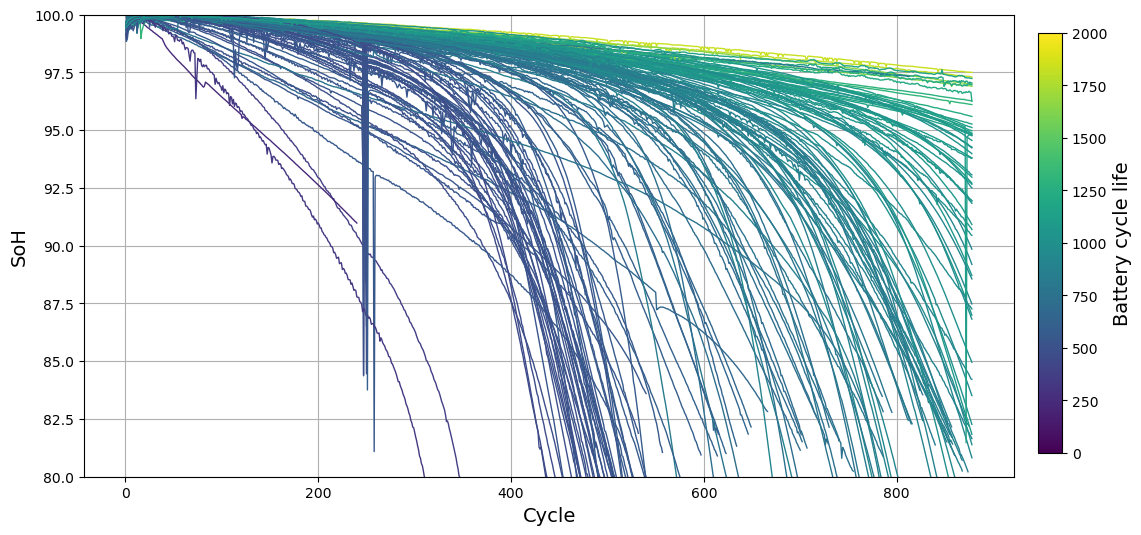

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Load the Excel file
file_path = '.../SOH_all.xlsx'
excel_data = pd.ExcelFile(file_path)

# Load the data from the first sheet
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Define the color map
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(vmin=0, vmax=2000)

# Plot all columns based on cycle with a line width of 0.4pt
plt.figure(figsize=(12, 6))

for column in df.columns[1:]:
    cycle_life = df[column].notna().sum()
    color = cmap(norm(cycle_life))
    plt.plot(df['Cycle'], df[column], linewidth=1, color=color)

plt.xlabel('Cycle', fontsize=14)
plt.ylabel('SoH', fontsize=14)
# plt.title('SoH over number of cycles for a set of representative batteries of the dataset.', fontsize=16)
plt.ylim(80, 100)
plt.grid(True)

# Create an axis for the colorbar
cbar_ax = plt.gcf().add_axes([0.92, 0.15, 0.02, 0.7])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.set_label('Battery cycle life', fontsize=14)

# Define the directory and file names
output_dir = os.path.dirname(file_path)
svg_file_path = os.path.join(output_dir, 'figure_soh.svg')
pdf_file_path = os.path.join(output_dir, 'figure_soh.pdf')

# Save the figure as a vector graphic
plt.savefig(svg_file_path, format='svg')
plt.savefig(pdf_file_path, format='pdf')

plt.show()


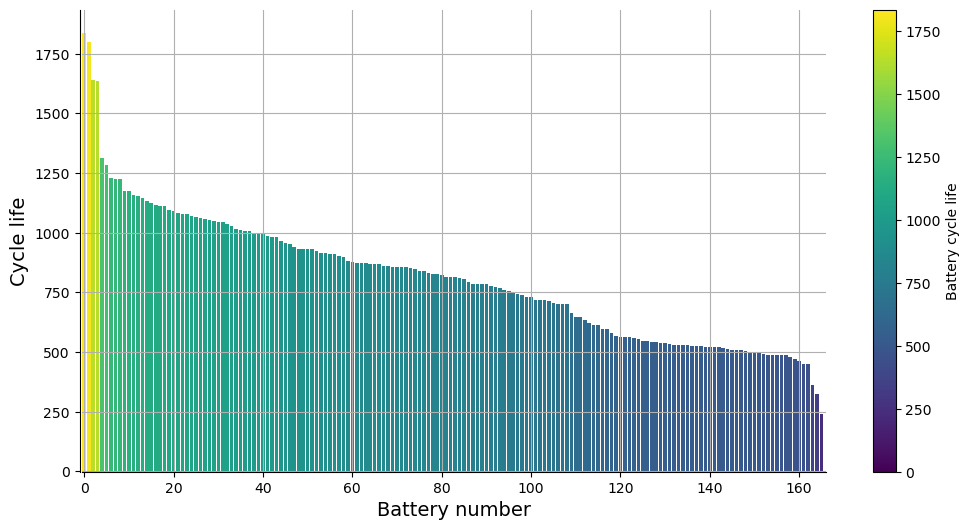

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os

# Load the Excel file
file_path = '.../SOH_all.xlsx'
excel_data = pd.ExcelFile(file_path)

# Load the data from the first sheet
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Calculate the cycle life for each battery
cycle_lives = []
for column in df.columns[1:]:
    cycle_life = df[column].notna().sum()
    cycle_lives.append(cycle_life)

# Sort the cycle lives for better visualization
cycle_lives_sorted = sorted(cycle_lives, reverse=True)

# Define the colormap
cmap = plt.get_cmap('viridis')
norm = mcolors.Normalize(vmin=0, vmax=max(cycle_lives_sorted))

# Plot the cycle life as a bar chart
plt.figure(figsize=(12, 6))
bar_colors = cmap(norm(cycle_lives_sorted))
bars = plt.bar(range(len(cycle_lives_sorted)), cycle_lives_sorted, color=bar_colors)

plt.xlabel('Battery number', fontsize=14)
plt.ylabel('Cycle life', fontsize=14)
plt.ylim(-0.5, max(cycle_lives_sorted) + 100)
plt.xlim(-0.5, len(cycle_lives_sorted))  # Adjust x-axis to start from -0.5
plt.grid(True)

# Ensure the 0 of x-axis and y-axis coincide with a gap of 0.5 units
plt.gca().spines['left'].set_position(('data', -1))
plt.gca().spines['bottom'].set_position(('data', -1))
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

# Add a color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Battery cycle life')

# Define the output directory and file names
output_dir = '.../Lifespan_Prediction_all'
svg_file_path = os.path.join(output_dir, 'data_contribute.svg')
pdf_file_path = os.path.join(output_dir, 'data_contribute.pdf')

# Save the figure as a vector graphic
plt.savefig(svg_file_path, format='svg')
plt.savefig(pdf_file_path, format='pdf')

plt.show()


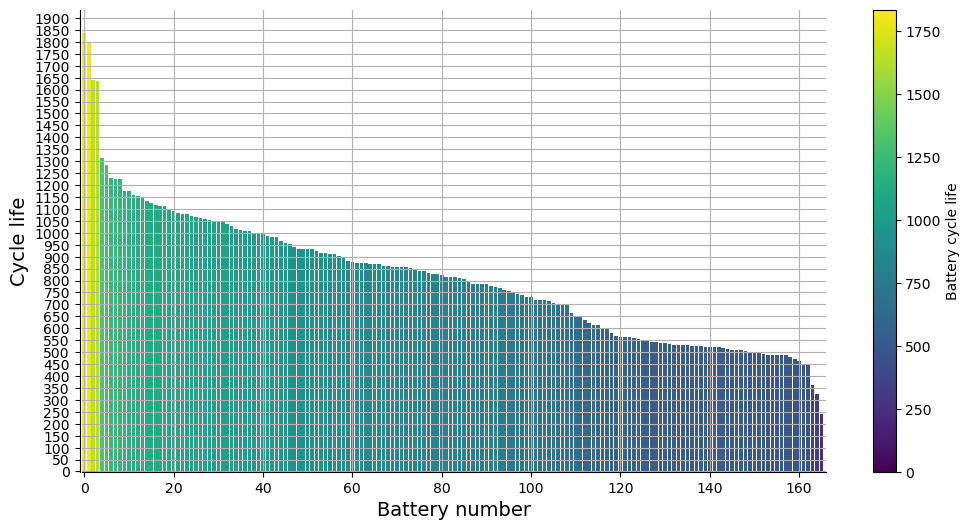

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os

# Load the Excel file
file_path = '.../Lifespan_Prediction_all/SOH_all.xlsx'
excel_data = pd.ExcelFile(file_path)

# Load the data from the first sheet
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Calculate the cycle life for each battery
cycle_lives = []
for column in df.columns[1:]:
    cycle_life = df[column].notna().sum()
    cycle_lives.append(cycle_life)

# Sort the cycle lives for better visualization
cycle_lives_sorted = sorted(cycle_lives, reverse=True)

# Define the colormap
cmap = plt.get_cmap('viridis')
norm = mcolors.Normalize(vmin=0, vmax=max(cycle_lives_sorted))

# Plot the cycle life as a bar chart
plt.figure(figsize=(12, 6))
bar_colors = cmap(norm(cycle_lives_sorted))
bars = plt.bar(range(len(cycle_lives_sorted)), cycle_lives_sorted, color=bar_colors)

plt.xlabel('Battery number', fontsize=14)
plt.ylabel('Cycle life', fontsize=14)
plt.ylim(-0.5, max(cycle_lives_sorted) + 100)
plt.xlim(-0.5, len(cycle_lives_sorted))  # Adjust x-axis to start from -0.5
plt.grid(True)

# Ensure the 0 of x-axis and y-axis coincide with a gap of 0.5 units
plt.gca().spines['left'].set_position(('data', -1))
plt.gca().spines['bottom'].set_position(('data', -1))
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

# Set y-axis ticks with a step of 50
plt.yticks(range(0, int(max(cycle_lives_sorted) + 100), 50))

# Add a color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Battery cycle life')

# Define the directory and file names
output_dir = os.path.dirname(file_path)
svg_file_path = os.path.join(output_dir, 'figure_cycle_life_colored.svg')
pdf_file_path = os.path.join(output_dir, 'figure_cycle_life_colored.pdf')

# Save the figure as a vector graphic
plt.savefig(svg_file_path, format='svg')
plt.savefig(pdf_file_path, format='pdf')

plt.show()


# Feature 1

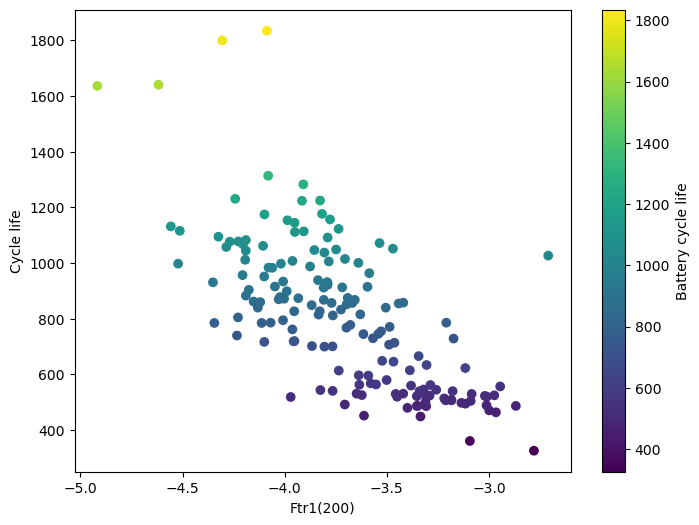

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '.../1_Range_3-2/Final.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Extract the relevant columns for plotting
cycle_life = data['Cycle']
ftr1_200 = data['Ftr1(k)']

# Path to save the vector images
export_path = '.../1_Range_3-2/'

# Create the scatter plot with color mapping based on cycle life
plt.figure(figsize=(8, 6))
scatter = plt.scatter(ftr1_200, cycle_life, c=cycle_life, cmap='viridis')
plt.xlabel('Ftr1(200)')
plt.ylabel('Cycle life')
plt.colorbar(scatter, label='Battery cycle life')
# plt.grid(True)

# Save the plot as SVG and PDF
svg_path = os.path.join(export_path, 'ftr1_vs_cycle_life_plot.svg')
pdf_path = os.path.join(export_path, 'ftr1_vs_cycle_life_plot.pdf')
plt.savefig(svg_path, format='svg')
plt.savefig(pdf_path, format='pdf')

# Show the plot
plt.show()


# Feature 2

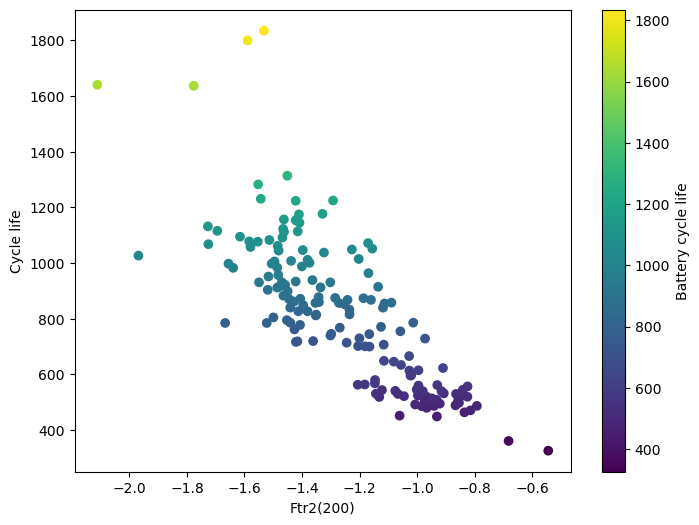

In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '.../1_Range_3-2/Final.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Extract the relevant columns for plotting
cycle_life = data['Cycle']
ftr1_200 = data['Ftr2(k)']

# Path to save the vector images
export_path = '.../1_Range_3-2/'

# Create the scatter plot with color mapping based on cycle life
plt.figure(figsize=(8, 6))
scatter = plt.scatter(ftr1_200, cycle_life, c=cycle_life, cmap='viridis')
plt.xlabel('Ftr2(200)')
plt.ylabel('Cycle life')
plt.colorbar(scatter, label='Battery cycle life')
# plt.grid(True)

# Save the plot as SVG and PDF
svg_path = os.path.join(export_path, 'ftr2_vs_cycle_life_plot.svg')
pdf_path = os.path.join(export_path, 'ftr2_vs_cycle_life_plot.pdf')
plt.savefig(svg_path, format='svg')
plt.savefig(pdf_path, format='pdf')

# Show the plot
plt.show()


# Feature 3

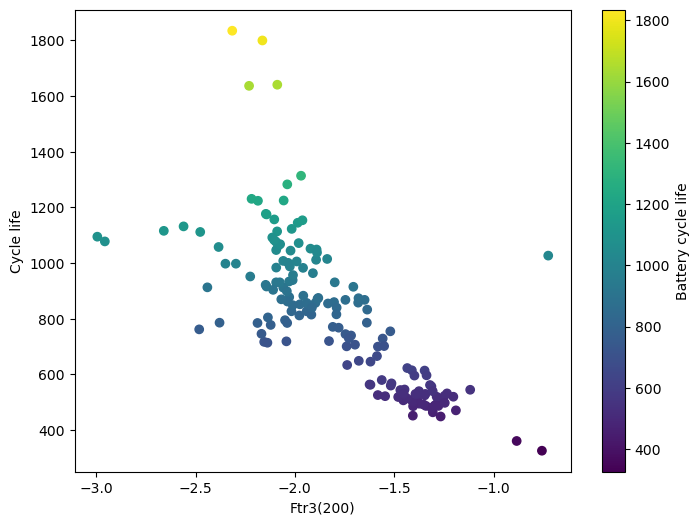

In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '.../1_Range_3-2/Final.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Extract the relevant columns for plotting
cycle_life = data['Cycle']
ftr1_200 = data['Ftr3(k)']

# Path to save the vector images
export_path = '.../1_Range_3-2/'

# Create the scatter plot with color mapping based on cycle life
plt.figure(figsize=(8, 6))
scatter = plt.scatter(ftr1_200, cycle_life, c=cycle_life, cmap='viridis')
plt.xlabel('Ftr3(200)')
plt.ylabel('Cycle life')
plt.colorbar(scatter, label='Battery cycle life')

# Save the plot as SVG and PDF
svg_path = os.path.join(export_path, 'ftr3_vs_cycle_life_plot.svg')
pdf_path = os.path.join(export_path, 'ftr3_vs_cycle_life_plot.pdf')
plt.savefig(svg_path, format='svg')
plt.savefig(pdf_path, format='pdf')

# Show the plot
plt.show()


# log(T)

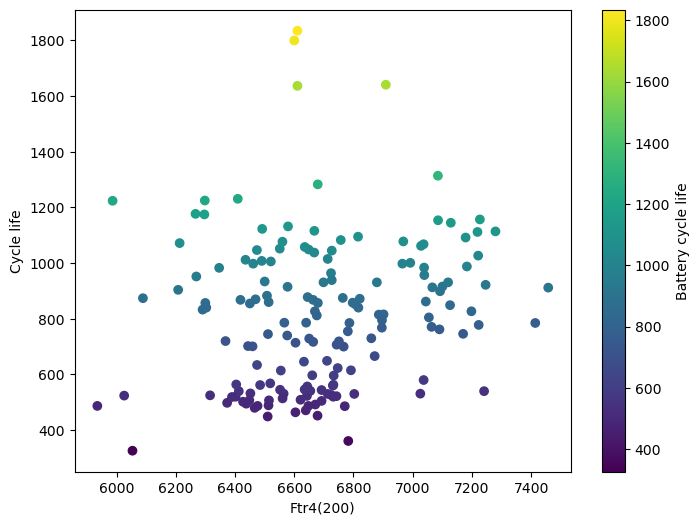

In [37]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '.../1_Range_3-2/Final.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Extract the relevant columns for plotting
cycle_life = data['Cycle']
ftr1_200 = data['sum(T)']

# Path to save the vector images
export_path = '.../1_Range_3-2/'

# Create the scatter plot with color mapping based on cycle life
plt.figure(figsize=(8, 6))
scatter = plt.scatter(ftr1_200, cycle_life, c=cycle_life, cmap='viridis')
plt.xlabel('Ftr4(200)')
plt.ylabel('Cycle life')
plt.colorbar(scatter, label='Battery cycle life')

# Save the plot as SVG and PDF
svg_path = os.path.join(export_path, 'logT_vs_cycle_life_plot.svg')
pdf_path = os.path.join(export_path, 'logT_vs_cycle_life_plot.pdf')
plt.savefig(svg_path, format='svg')
plt.savefig(pdf_path, format='pdf')

# Show the plot
plt.show()


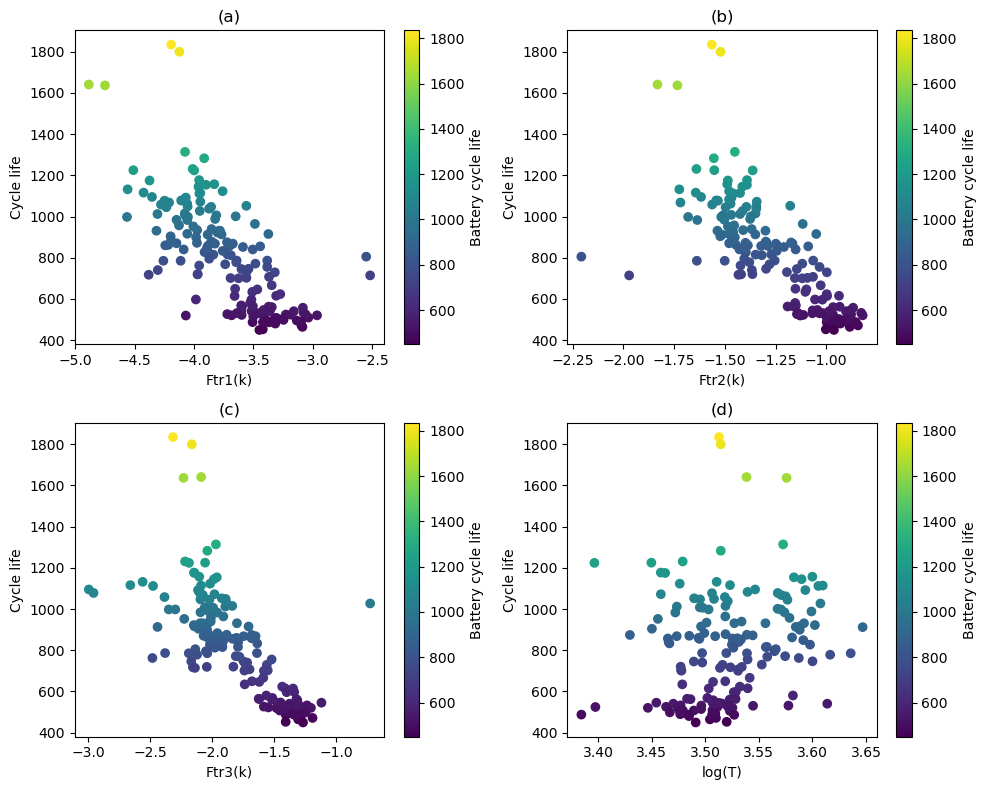

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '.../1_Range_3-2/Final.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Extract the relevant columns for plotting
cycle_life = data['Cycle']
ftr1_200 = data['Ftr1(k)']
ftr2_200 = data['Ftr2(k)']
ftr3_200 = data['Ftr3(k)']
log_T = data['log(T)']

# Create the scatter plots in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot for Ftr1(200)
scatter1 = axs[0, 0].scatter(ftr1_200, cycle_life, c=cycle_life, cmap='viridis')
axs[0, 0].set_xlabel('Ftr1(k)')
axs[0, 0].set_ylabel('Cycle life')
# axs[0, 0].grid(True)
axs[0, 0].set_title('(a)')
fig.colorbar(scatter1, ax=axs[0, 0], label='Battery cycle life')

# Plot for Ftr2(200)
scatter2 = axs[0, 1].scatter(ftr2_200, cycle_life, c=cycle_life, cmap='viridis')
axs[0, 1].set_xlabel('Ftr2(k)')
axs[0, 1].set_ylabel('Cycle life')
# axs[0, 1].grid(True)
axs[0, 1].set_title('(b)')
fig.colorbar(scatter2, ax=axs[0, 1], label='Battery cycle life')

# Plot for Ftr3(200)
scatter3 = axs[1, 0].scatter(ftr3_200, cycle_life, c=cycle_life, cmap='viridis')
axs[1, 0].set_xlabel('Ftr3(k)')
axs[1, 0].set_ylabel('Cycle life')
# axs[1, 0].grid(True)
axs[1, 0].set_title('(c)')
fig.colorbar(scatter3, ax=axs[1, 0], label='Battery cycle life')

# Plot for log(T)
scatter4 = axs[1, 1].scatter(log_T, cycle_life, c=cycle_life, cmap='viridis')
axs[1, 1].set_xlabel('log(T)')
axs[1, 1].set_ylabel('Cycle life')
# axs[1, 1].grid(True)
axs[1, 1].set_title('(d)')
fig.colorbar(scatter4, ax=axs[1, 1], label='Battery cycle life')

plt.tight_layout()
plt.show()
